In [18]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import counter 
from collections import Counter

In [19]:
# remove ds_store file from download folder
os.system("find . -name '.DS_Store' -type f -delete")

0

In [20]:
# walk through directory with json files
l = []
for dirpath, dirnames, filenames in os.walk("downloads/oerestad"):
    for filename in filenames:
        # read json file
        with open(os.path.join(dirpath, filename)) as f:
            data = json.load(f)
        l.append(data)



In [21]:
# convert l to dataframe
df = pd.DataFrame(l)
# sort dataframe by date
df = df.sort_values(by=['time'], ascending= False)

In [22]:
df.columns
# take only important columns
df = df[['post_id','username','post_text','time','comments', 'comments_full','reaction_count','reactors','reactions','with','sharers']]

In [23]:
df

,post_id,username,post_text,time,comments,comments_full,reaction_count,reactors,reactions,with,sharers
2640,2632787626872342,Veronika Mosca Macháčková,If you're planning to leave your dogs in front...,2022-12-08 19:13:40,3,"[{'comment_id': '2632792753538496', 'comment_u...",3,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
1642,2632414500242988,Anja Hedberg Pedersen,Vi har denne pakke liggende i opgangen på C.F....,2022-12-08 10:11:26,3,"[{'comment_id': '2632425253575246', 'comment_u...",3,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
4,2632366893581082,Christina Maxwell,"SOLGT, Simply Red billetter til salg",2022-12-08 08:38:28,0,[],0,None,None,None,None
993,2632307676920337,Jan Jeppesen,For halvandet år siden havde Københavns Kommun...,2022-12-08 06:35:53,2,"[{'comment_id': '2632335213584250', 'comment_u...",1,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2461,2631952240289214,Jesper Dahlsgaard Jepsen,"Bare lige et heads up, undgå veje og cykelstie...",2022-12-07 19:57:00,2,"[{'comment_id': '2632005360283902', 'comment_u...",37,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
...,...,...,...,...,...,...,...,...,...,...,...
480,1471289723022144,Lise Kirstein Traczyk,"4 stk. fribilletter til ""Bolig, mad, design""- ...",2019-03-16 13:08:45,21,"[{'comment_id': '1471294313021685', 'comment_u...",3,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2477,1360459784105139,Nana Kjærsgaard,Hej jeg hedder Nana.\nJeg er 13 år gammel og g...,2018-10-01 19:24:39,1,"[{'comment_id': '2390285194455921', 'comment_u...",85,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
410,805515959599527,Leise Holz Borch,Jeg har lige været vidne til at en beboer fra ...,2017-02-11 13:27:41,121,"[{'comment_id': '805528986264891', 'comment_ur...",5,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2671,798478330303290,Anja Davidsen,Ja tak til at man fjerner sin hunds lort for a...,2017-01-30 23:14:10,5,"[{'comment_id': '798693633615093', 'comment_ur...",10,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None


In [27]:
# select rows from 2022
df_22 = df[df['time'] > '2022-01-01']
df_22

,post_id,username,post_text,time,comments,comments_full,reaction_count,reactors,reactions,with,sharers
2640,2632787626872342,Veronika Mosca Macháčková,If you're planning to leave your dogs in front...,2022-12-08 19:13:40,3,"[{'comment_id': '2632792753538496', 'comment_u...",3,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
1642,2632414500242988,Anja Hedberg Pedersen,Vi har denne pakke liggende i opgangen på C.F....,2022-12-08 10:11:26,3,"[{'comment_id': '2632425253575246', 'comment_u...",3,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
4,2632366893581082,Christina Maxwell,"SOLGT, Simply Red billetter til salg",2022-12-08 08:38:28,0,[],0,None,None,None,None
993,2632307676920337,Jan Jeppesen,For halvandet år siden havde Københavns Kommun...,2022-12-08 06:35:53,2,"[{'comment_id': '2632335213584250', 'comment_u...",1,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2461,2631952240289214,Jesper Dahlsgaard Jepsen,"Bare lige et heads up, undgå veje og cykelstie...",2022-12-07 19:57:00,2,"[{'comment_id': '2632005360283902', 'comment_u...",37,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
...,...,...,...,...,...,...,...,...,...,...,...
1528,2339573656193742,Sabrina Christine Haugaard,Vi træner i naturen ved Naturcenter Amager - d...,2022-01-01 22:36:41,0,[],1,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2339,2339457962871978,Anja Bech Larsen,Hej 😃. Er der nogen forældre herinde der hjemm...,2022-01-01 18:28:04,6,"[{'comment_id': '2339478732869901', 'comment_u...",4,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2851,2339363899548051,Martin Jensen,Hej vi er et band fra Ørestad og vi har lige u...,2022-01-01 15:55:47,9,"[{'comment_id': '2339364036214704', 'comment_u...",21,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2644,2339304272887347,Konsjös,,2022-01-01 14:18:02,7,"[{'comment_id': '2339325756218532', 'comment_u...",8,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None


In [31]:
df_kommentar = df_22['comments_full'].tolist()
df_kommentar

[[{'comment_id': '673971629420628',
   'comment_url': 'https://facebook.com/673971629420628',
   'commenter_id': '628385613',
   'commenter_url': None,
   'commenter_name': 'Christian Baden Andersen',
   'commenter_meta': None,
   'comment_text': 'Der er flere som har skrevet i løbet af årene, at deres biler er blevet ridset eller dæk der er punkterede ude foran Chilis... Efter hvad jeg har hørt er det Chilis medarbejdere som gør det, da de ser det som "deres" parkering... (er der ihvertfald flere som har skrevet) :) ved ikke om det er rigtigt eller forkert :)',
   'comment_time': '2023-12-07 00:00:00',
   'comment_image': None,
   'comment_reactors': [],
   'comment_reactions': None,
   'comment_reaction_count': None,
   'replies': [{'comment_id': '673996219418169',
     'comment_url': 'https://facebook.com/673996219418169',
     'commenter_id': '556090907',
     'commenter_url': None,
     'commenter_name': 'Kassia F Andersen',
     'commenter_meta': None,
     'comment_text': 'Sinds

In [28]:

# Take only important columns
important_columns = ['post_id', 'username', 'post_text', 'time', 'comments', 'comments_full',
                     'reaction_count', 'reactors', 'reactions', 'with', 'sharers']
df_22 = df[important_columns]

# Sort the DataFrame by the 'time' column
df_22.sort_values(by='time', inplace=True)

# To get unique values in the 'time' column
unique_time_values = df['time'].unique()

# Display the DataFrame
print(df_22)
print(unique_time_values)

               post_id                   username  \
1402   673961959421595     Michael Ørsted Nielsen   
2671   798478330303290              Anja Davidsen   
410    805515959599527           Leise Holz Borch   
2477  1360459784105139            Nana Kjærsgaard   
480   1471289723022144      Lise Kirstein Traczyk   
...                ...                        ...   
2461  2631952240289214   Jesper Dahlsgaard Jepsen   
993   2632307676920337               Jan Jeppesen   
4     2632366893581082          Christina Maxwell   
1642  2632414500242988      Anja Hedberg Pedersen   
2640  2632787626872342  Veronika Mosca Macháčková   

                                              post_text                 time  \
1402  Mine forældres bil er blevet ridset på alle fi...  2016-07-16 18:44:08   
2671  Ja tak til at man fjerner sin hunds lort for a...  2017-01-30 23:14:10   
410   Jeg har lige været vidne til at en beboer fra ...  2017-02-11 13:27:41   
2477  Hej jeg hedder Nana.\nJeg er 13 år ga

In [25]:
df_22.username.value_counts()

ØRESTAD AVIS                  136
Linda Mark                     77
Sabrina Christine Haugaard     68
Kirken i Ørestad               62
Nik Khanthong                  52
                             ... 
Minbabyogmig Doula Camilla      1
Hector Aaskov Nielsen           1
Linea Louise Michaelsen         1
Victoria Rose Bjerre            1
Konsjös                         1
Name: username, Length: 1208, dtype: int64

In [26]:
# group by username and count number of posts
df_22[df_22['username'] == 'Peter Hjorth']

,post_id,username,post_text,time,comments,comments_full,reaction_count,reactors,reactions,with,sharers
1249,2622473014570470,Peter Hjorth,Så kom Julen til Ørestad! 🎅,2022-11-26 13:07:45,0,[],5,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
769,2618295511654887,Peter Hjorth,Hvad synes du?\n\nhttps://www.facebook.com/gro...,2022-11-21 11:43:09,0,[],0,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2379,2609595909191514,Peter Hjorth,Tonight!\n\nCopenhagen Falcons hjemmekamp i Ør...,2022-11-11 10:55:41,0,[],7,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2398,2602571759893929,Peter Hjorth,"Hvis man vil med på et af svømmeholdene, så sk...",2022-11-02 23:30:51,0,[],3,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2551,2597878573696581,Peter Hjorth,Slik eller ballade !! 👻💀\n\nVi holder varmen m...,2022-10-28 11:24:23,9,"[{'comment_id': '2597882390362866', 'comment_u...",49,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
1447,2588810871270018,Peter Hjorth,Torsdag og fredag kl 12-15 i Ørestad Syd. Vi s...,2022-10-18 08:19:53,3,"[{'comment_id': '2588823304602108', 'comment_u...",5,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2010,2580989242052181,Peter Hjorth,Dette billede af en måske fremtidig bebyggelse...,2022-10-09 21:33:57,1,"[{'comment_id': '2581870625297376', 'comment_u...",13,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
1623,2579486385535800,Peter Hjorth,Nyt Halloween-event i Ørestad med gratis slik ...,2022-10-08 12:36:58,3,"[{'comment_id': '2579520955532343', 'comment_u...",1,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
2885,2569862856498153,Peter Hjorth,Ørestad Syd Borgerforening og Ørestad Street F...,2022-09-29 17:41:20,1,"[{'comment_id': '2573753099442462', 'comment_u...",11,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None
1886,2563165123834593,Peter Hjorth,"Seneste meldinger jeg har fået idag lyder, at ...",2022-09-22 13:37:41,0,[],12,None,None,"[{'name': 'Ørestad', 'link': 'https://m.facebo...",None


In [13]:
#group by username and count number of reactions and show top 10
df_22.groupby('username')['reaction_count'].sum().sort_values(ascending=False).head(15)
# show all rows with username == David Hartel
# extract all names from "reactors" column

username
Henning Jølnæs         57
Jan Jeppesen           46
Olivia Loftlund        42
Heidi Kæmmer           27
Loke Busch             21
Tanja Thomsen          20
Claire Tsang           17
Rasmus Steenberger     13
Casper Thiemke Chau    12
Rukaya Hamade          10
Casper Rostrup          9
Johnny Wärnstrøm        8
Eva Sofie Rafn          7
Sofie Lersey Jensen     7
Safia Ullah             7
Name: reaction_count, dtype: int64

In [13]:
# iterate through all reactors in df_22
c_react_type = Counter()

for i in df_22.index:
    reactors = df_22['reactors'][i]
    commenters = df_22['comments_full'][i]
    if reactors:
        for reactor in reactors:
            name = reactor["name"]
            type = reactor["type"]
            c = Counter({type:1})
            if c_react_type[name] == 0:
                c_react_type[name] = c
            else:
                c_react_type[name] += c
    if commenters:
        for commenter in commenters:
            name = commenter["commenter_name"]
            reactors = commenter["comment_reactors"]
            if reactors:
                for reactor in reactors:
                    name = reactor["name"]
                    type = reactor["type"]
                    c = Counter({type:1})
                    if c_react_type[name] == 0:
                        c_react_type[name] = c
                    else:
                        c_react_type[name] += c
            c = Counter({"comment":1})
            if c_react_type[name] == 0:
                c_react_type[name] = c
            else:
                c_react_type[name] += c


In [14]:
# convert c_react_type to data frame
df_react_type = pd.DataFrame.from_dict(c_react_type, orient='index')

In [48]:
# iterate through unique index names
forenings_dict = {}
for name in df_react_type.index.unique():
    # ask for forening via input
    attribute = input(f"Enter forening for {name}: ")
    forenings_dict[name] = attribute

In [47]:
# append column to df_react_type with forening
df_react_type['forening'] = df_react_type.index.map(forenings_dict)

NameError: name 'forenings_dict' is not defined

In [16]:
# sort df_react_type love column
df_react_type.sort_values(by=['love'], ascending=False).head(10)

KeyError: 'love'

In [17]:
# sum over all columns and create a new column
df_react_type['total'] = df_react_type.sum(axis=1)
# remove rows with total < 10
df_react_type = df_react_type[df_react_type['total'] > 9]

In [18]:
# divide column love by like
df_react_type['love_ratio'] = df_react_type['love'] / df_react_type['total']
df_react_type.sort_values(by=['love_ratio'], ascending=False).head(10)

KeyError: 'love'

In [19]:
df_react_type['angry_ratio'] = df_react_type['angry'] / df_react_type['total']
df_react_type.sort_values(by=['angry_ratio'], ascending=False).head(10)

KeyError: 'angry'

In [20]:
df_react_type['comment_ratio'] = df_react_type['comment'] / df_react_type['total']
df_react_type.sort_values(by=['comment_ratio'], ascending=False).head(10)

,comment,total,comment_ratio
Mette Bugge,15,15,1.0
Peter Hjorth,32,32,1.0
Sus Torsson,10,10,1.0


In [21]:
df_react_type['like_ratio'] = df_react_type['like'] / df_react_type['total']
df_react_type.sort_values(by=['like_ratio'], ascending=False).head(10)

KeyError: 'like'

In [22]:
df_react_type.sort_values(by=['care'], ascending=False).head(10)

KeyError: 'care'

In [23]:
df_react_type['care_ratio'] = df_react_type['care'] / df_react_type['total']
df_react_type.sort_values(by=['care_ratio'], ascending=False).head(10)

KeyError: 'care'

In [24]:
df_react_type.sort_values(by=['sad'], ascending=False).head(10)

KeyError: 'sad'

In [25]:
df_react_type['sad_ratio'] = df_react_type['sad'] / df_react_type['total']
df_react_type.sort_values(by=['sad_ratio'], ascending=False).head(10)

KeyError: 'sad'

In [26]:
df_react_type.sort_values(by=['haha'], ascending=False).head(10)

KeyError: 'haha'

In [27]:
df_react_type['haha_ratio'] = df_react_type['haha'] / df_react_type['total']
df_react_type.sort_values(by=['haha_ratio'], ascending=False).head(10)

KeyError: 'haha'

In [28]:
df_react_type.sort_values(by=['wow'], ascending=False).head(10)

KeyError: 'wow'

In [29]:
df_react_type['wow_ratio'] = df_react_type['wow'] / df_react_type['total']
df_react_type.sort_values(by=['wow_ratio'], ascending=False).head(10)

KeyError: 'wow'

In [30]:
df_react_type.sort_values(by=['comment'], ascending=False).head(10)

,comment,total,comment_ratio
Peter Hjorth,32,32,1.0
Mette Bugge,15,15,1.0
Sus Torsson,10,10,1.0


In [31]:
# convert dataframe values to float except forening column
df_react_type = df_react_type.apply(pd.to_numeric, errors='ignore')

# save df_react_type to csv
df_react_type.to_csv('df_react_type.csv')

In [32]:
# import csv file
df_react_type = pd.read_csv('df_react_type.csv', index_col=0)

## Create a network that describes the reaction flows


In [33]:
from collections import Counter
c_reactions = Counter(Counter())

In [34]:
# iterate through all reactors in df_22
for i in df_22.index:
    post_creator = df_22.loc[i, 'username']
    reactors = df_22['reactors'][i]
    commenters = df_22['comments_full'][i]
    c = Counter()
    if reactors:
        for reactor in reactors:
            name = reactor["name"]
            c[name] += 1
    if commenters:
        for commenter in commenters:
            name = commenter["commenter_name"]
            c[name] += 1
    # add two counters
    if c_reactions[post_creator] == 0:
        c_reactions[post_creator] = c
    else:
        c_reactions[post_creator] += c

In [35]:
# create graph from c_reactions
import networkx as nx

G = nx.Graph()
for post_creator, c in c_reactions.items():
    for name, count in c.items():
        G.add_edge(post_creator, name, weight=count)
        


In [36]:
# create directed graph
G = nx.DiGraph()
for post_creator, c in c_reactions.items():
    for name, count in c.items():
        G.add_edge(name, post_creator, weight=count)
        # try to add forening to node
        try:
            forening = df_react_type.loc[name, 'forening']
            G.nodes[name]['forening'] = forening
        except:
            pass
        


In [37]:
# save graph
nx.write_gexf(G, "graph.gexf")

## Calculate reactor tf-idf to extract important reactors for each user
Idea: find out who gave most attention to your posts by reacting with an emoji or a comment. Some people reacted to a lot of different peoples posts, other to only a few. Those who reacted only to few people will get a higher importance for those people. Hence the top reactors are users who reacted very often OR very uniquely to your post.


Read more about tf-idf here: https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089


In [38]:
#  #### calcute tf idf for all all reactions #### 
# tf(post_creator, reactor) = 
#          count of reactions from reactor to post_creators post / sum of all reactions to post
# df(reactor) = occurance of reactor in all N posts
# idf(reactor) = log(N / df(reactor + 1 ))

# TF
# for each name in c_reactions count ratio of reactions
tf = Counter(Counter())
for name, c in c_reactions.items():
    c_ratio = Counter()
    for reaction, count in c.items():
        c_ratio[reaction] = count / sum(c.values())
    tf[name] = c_ratio

# DF
# for each name in c_reactions count occurance of name in all posts
df = Counter()
for name, c in c_reactions.items():
    for reactor in c.keys():
        df[reactor] += 1  

# IDF
# for each name in c_reactions count idf
idf = Counter()
for name, c in c_reactions.items():
    c_idf = Counter()
    for reactor in c.keys():
        c_idf[reactor] = np.log(len(c_reactions) / (df[reactor] + 1))
    idf[name] = c_idf

# TF-IDF
# for each name in c_reactions count tf-idf
tf_idf = Counter(Counter())
for name, c in c_reactions.items():
    c_tf_idf = Counter()
    for reactor in c.keys():
        c_tf_idf[reactor] = tf[name][reactor] * idf[name][reactor]
    tf_idf[name] = c_tf_idf

In [39]:
# save top 3 tf-idf for each post creator 
top_3 = Counter(Counter())
for name, c in tf_idf.items():
    top_3[name] = c.most_common(3)
# convert to dataframe
df_top_3 = pd.DataFrame.from_dict(top_3, orient='index')
#rename columns to reactor 1, 2, 3
df_top_3.columns = ['reactor_1', 'reactor_2', 'reactor_3']
#rename index to post_creator
df_top_3.index.name = 'post_creator'
# save to csv
df_top_3.to_csv('df_top_3.csv')


In [40]:
df_top_3

,reactor_1,reactor_2,reactor_3
post_creator,,,
Peter Hjorth,"(Peter Hjorth, 0.10010857828537466)","(Kristian Mouritzen, 0.09586318739955159)","(Anja Bech Larsen, 0.08505617371984243)"
Henning Bjørn Christiansen,"(Sus Torsson, 2.169053700369523)",None,None
Tanja Thomsen,None,None,None
Glimt Amager,"(Tobias Sonne Olsen, 3.5553480614894135)",None,None
Georg Jagunov,"(Loke Busch, 0.7874707383453123)","(Anders Højer Hoffmann, 0.7155502202323671)","(Sus Torsson, 0.5422634250923808)"
...,...,...,...
Christa Neutzsky Wulff Sarby,"(Peter Hjorth, 1.6094379124341003)",None,None
Johnny Wärnstrøm,"(Christian Thomassen, 0.7110696122978828)","(Stinus Nielsen, 0.7110696122978828)","(Nicolai Zimling Fich, 0.5278114659230517)"
Maiken Popsi,"(Ditte Nygaard Rasmussen, 0.7110696122978828)","(Rikke Holmboe, 0.7110696122978828)","(Trine Lisbjerg Mortensen, 0.7110696122978828)"


## Forenings stats
goal: find out which forening spreads most love, hate, anger in the klokker protokoll

In [41]:
# rename in df_react_type "u" to "Uglen"
df_react_type.loc[df_react_type['forening'] == 'u', 'forening'] = 'Uglen'
# rename in df_react_type "sk" to "Skrap"
df_react_type.loc[df_react_type['forening'] == 'sk', 'forening'] = 'Skrap'
# rename in df_react_type "g" to "Gamle"
df_react_type.loc[df_react_type['forening'] == 'g', 'forening'] = 'Gamle'
# rename in df_react_type "i" to "Indflytter"
df_react_type.loc[df_react_type['forening'] == 'i', 'forening'] = 'Indflytter'
# rename in df_react_type "sh" to "Shoe"
df_react_type.loc[df_react_type['forening'] == 'sh', 'forening'] = 'Shoe'
# rename in df_react_type "pi" to "Ping"
df_react_type.loc[df_react_type['forening'] == 'pi', 'forening'] = 'Ping'
# rename in df_react_type "pip" to "Pip"
df_react_type.loc[df_react_type['forening'] == 'pip', 'forening'] = 'Pip'
# rename in df_react_type "t" to "Tilia"
df_react_type.loc[df_react_type['forening'] == 't', 'forening'] = 'Tilia'
# rename in df_react_type "h" to "Hof" 
df_react_type.loc[df_react_type['forening'] == 'h', 'forening'] = 'Hof'
# rename in df_react_type "?" to "Foreningslos"
df_react_type.loc[df_react_type['forening'] == '?', 'forening'] = 'foreningsløs'
# replace forening "s" with "Shoe"
df_react_type.loc[df_react_type['forening'] == 's', 'forening'] = 'Shoe'
# replace forening "c" with "Convencio"
df_react_type.loc[df_react_type['forening'] == 'c', 'forening'] = 'Convencio'
# save to csv
df_react_type.to_csv('df_react_type.csv')


KeyError: 'forening'

In [42]:
df_react_type

,comment,total,comment_ratio
Mette Bugge,15,15,1.0
Peter Hjorth,32,32,1.0
Sus Torsson,10,10,1.0


In [43]:
#create a new df with top 5 reactors in each category
df_react_type_top = pd.DataFrame()
df_react_type_top['love_ratio'] = df_react_type.sort_values(by=['love_ratio'], ascending=False).head(5).index
df_react_type_top['angry_ratio'] = df_react_type.sort_values(by=['angry_ratio'], ascending=False).head(5).index
df_react_type_top['comment_ratio'] = df_react_type.sort_values(by=['comment_ratio'], ascending=False).head(5).index
df_react_type_top['like_ratio'] = df_react_type.sort_values(by=['like_ratio'], ascending=False).head(5).index
df_react_type_top['care_ratio'] = df_react_type.sort_values(by=['care_ratio'], ascending=False).head(5).index
df_react_type_top['sad_ratio'] = df_react_type.sort_values(by=['sad_ratio'], ascending=False).head(5).index
df_react_type_top['haha_ratio'] = df_react_type.sort_values(by=['haha_ratio'], ascending=False).head(5).index
df_react_type_top['wow_ratio'] = df_react_type.sort_values(by=['wow_ratio'], ascending=False).head(5).index
df_react_type_top['total'] = df_react_type.sort_values(by=['total'], ascending=False).head(5).index
# rename index from 1 to 5
df_react_type_top.index = range(1,6)  
df_react_type_top

KeyError: 'love_ratio'

In [44]:
#group by forening and average over all columns
df_react_type_grouped = df_react_type.groupby('forening').mean()
df_react_type_grouped

KeyError: 'forening'

In [45]:
#create a new df with top 3 forening for love, angry, comment, like, care, sad, haha, wow and total
df_react_type_grouped_top = pd.DataFrame()
df_react_type_grouped_top['love_ratio'] = df_react_type_grouped.sort_values(by=['love_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['angry_ratio'] = df_react_type_grouped.sort_values(by=['angry_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['comment_ratio'] = df_react_type_grouped.sort_values(by=['comment_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['like_ratio'] = df_react_type_grouped.sort_values(by=['like_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['care_ratio'] = df_react_type_grouped.sort_values(by=['care_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['sad_ratio'] = df_react_type_grouped.sort_values(by=['sad_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['haha_ratio'] = df_react_type_grouped.sort_values(by=['haha_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['wow_ratio'] = df_react_type_grouped.sort_values(by=['wow_ratio'], ascending=False).head(3).index
df_react_type_grouped_top['total'] = df_react_type_grouped.sort_values(by=['total'], ascending=False).head(3).index
# rename index from 1 to 3
df_react_type_grouped_top.index = range(1,4)
df_react_type_grouped_top


NameError: name 'df_react_type_grouped' is not defined

NameError: name 'df_react_type_grouped' is not defined

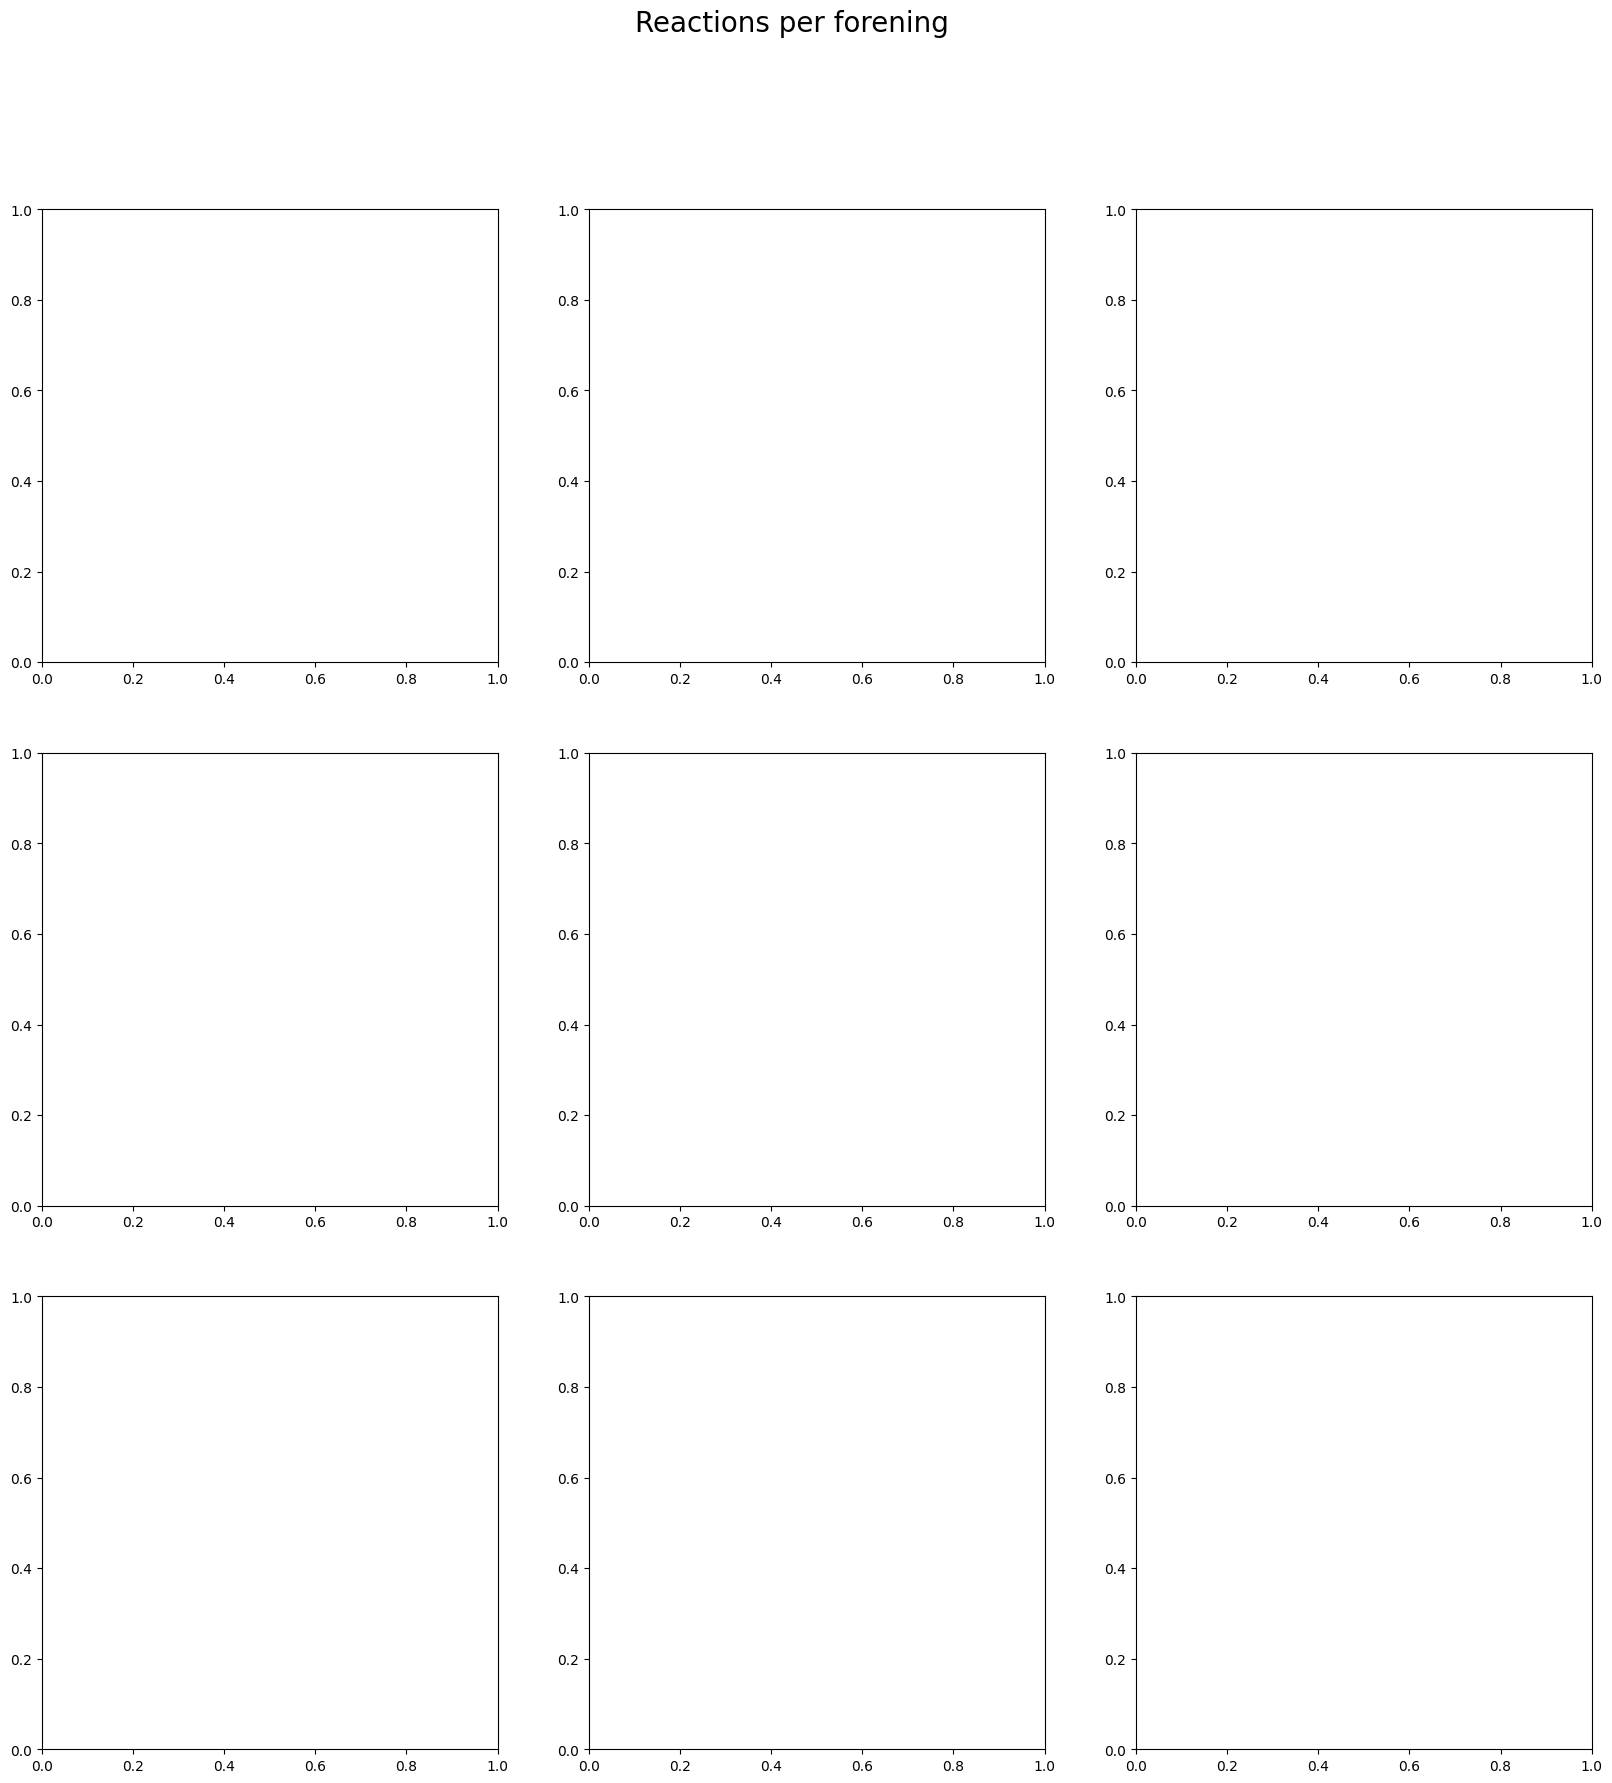

In [46]:
# for columns love, angry, comment, like, care, sad, haha, wow, total plot bar chart with seaborn and sort by value as gridplot
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Reactions per forening', fontsize=20)
for i, ax in enumerate(axes.flat):
    sns.barplot(x=df_react_type_grouped.sort_values(by=df_react_type_grouped.columns[i], ascending=False).index, y=df_react_type_grouped.sort_values(by=df_react_type_grouped.columns[i], ascending=False)[df_react_type_grouped.columns[i]], ax=ax)
    # colour bar by forening name
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ax.set_title(df_react_type_grouped.columns[i])
    ax.set_xlabel('forening')
    ax.set_ylabel('reactions')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


In [ ]:

df_react_type_grouped_top = pd.DataFrame()
df_react_type_grouped_top['love'] = df_react_type_grouped.sort_values(by=['love'], ascending=False).head(3).index
df_react_type_grouped_top['angry'] = df_react_type_grouped.sort_values(by=['angry'], ascending=False).head(3).index
df_react_type_grouped_top['comment'] = df_react_type_grouped.sort_values(by=['comment'], ascending=False).head(3).index
df_react_type_grouped_top['like'] = df_react_type_grouped.sort_values(by=['like'], ascending=False).head(3).index
df_react_type_grouped_top['care'] = df_react_type_grouped.sort_values(by=['care'], ascending=False).head(3).index
df_react_type_grouped_top['sad'] = df_react_type_grouped.sort_values(by=['sad'], ascending=False).head(3).index
df_react_type_grouped_top['haha'] = df_react_type_grouped.sort_values(by=['haha'], ascending=False).head(3).index
df_react_type_grouped_top['wow'] = df_react_type_grouped.sort_values(by=['wow'], ascending=False).head(3).index
df_react_type_grouped_top['total'] = df_react_type_grouped.sort_values(by=['total'], ascending=False).head(3).index
df_react_type_grouped_top